In [16]:
import numpy as np
import torch as th
import matplotlib.pyplot as plt
import sys, re, os, path

# own scrips
sys.path.insert(1, '/home/leonriccius/PycharmProjects/data_driven_rans')
from scripts.preProcess import readPatchData

In [20]:
import contextlib
import io
import sys

class NoStdStreams(object):
    def __init__(self,stdout = None, stderr = None):
        self.devnull = open(os.devnull,'w')
        self._stdout = stdout or self.devnull or sys.stdout
        self._stderr = stderr or self.devnull or sys.stderr

    def __enter__(self):
        self.old_stdout, self.old_stderr = sys.stdout, sys.stderr
        self.old_stdout.flush(); self.old_stderr.flush()
        sys.stdout, sys.stderr = self._stdout, self._stderr

    def __exit__(self, exc_type, exc_value, traceback):
        self._stdout.flush(); self._stderr.flush()
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr
        self.devnull.close()

In [119]:
path = '/home/leonriccius/Desktop/ConvDivChannel/Re12600_mesh_convergence'
folders = sorted([folder for folder in os.listdir(path) if os.path.isdir(os.sep.join([path, folder]))], reverse=True)

# file = 'wallShearStress'
# fileName = os.sep.join([path, file])
# patch = 'bottomWall'
# shearStress = readPatchData(os.sep.join([path, 'wallShearStress']), patch)
# cellCenters = readPatchData(os.sep.join([path, 'cellCenters']), patch)

In [120]:
path_kaan = '/home/leonriccius/Documents/Fluid_Data/rans_kaandorp/ConvDivChannel/Re12600_kOmega_100/postProcessing/sampleDict/7000/wallShearStress_bottomWall.raw'
shearStressKaan = np.loadtxt(path_kaan)

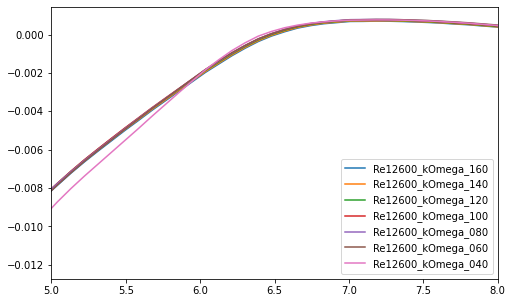

In [126]:
fig, ax = plt.subplots(figsize = (8, 5))

for folder in folders:
    
    #read in data
    patch = 'bottomWall'
    with NoStdStreams():
        shearStress = readPatchData(os.sep.join([path, folder, '7000/wallShearStress']), patch)
        cellCenters = readPatchData(os.sep.join([path, folder, '7000/cellCenters']), patch)
    
    tangent = th.zeros_like(cellCenters)
    length = cellCenters.shape[0]

    # compute tangents
    for i in range(length):
        if i == 0:
            tangent[0,:] = cellCenters[i+1] - cellCenters[i]
        elif i==length-1:
            tangent[i,:] = cellCenters[i] - cellCenters[i-1]
        else:
            tangent[i,:] = cellCenters[i+1] - cellCenters[i-1]

    # normalize tangents
    tangent = tangent/th.norm(tangent, dim=1).unsqueeze(1)
    normal = tangent[:,[1,0,2]]
    normal[:,0] = -normal[:,0]

    # project shear stress onto tangent vector
    shearStressTangential = th.einsum('ij,ij->i', tangent, shearStress)
    shearStressNormal = th.einsum('ij,ij->i', normal, shearStress)
    
    ax.plot(cellCenters[:,0], shearStressTangential)
    ax.set_xlim([5,8])
#     ax.set_ylim([-0.0002, 0.000])
    
ax.legend(folders)

(0.0, 2.0)

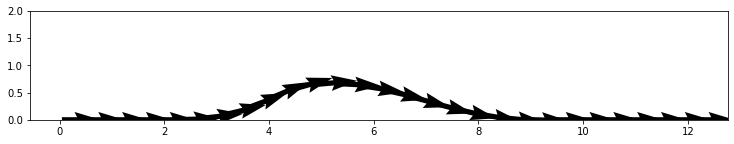

In [14]:
fig, ax = plt.subplots(figsize = (12.5, 2))
ax.quiver(cellCenters[::5,0], cellCenters[::5,1], tangent[::5,0], tangent[::5,1])
ax.set_ylim([0,2])

(0.0, 2.0)

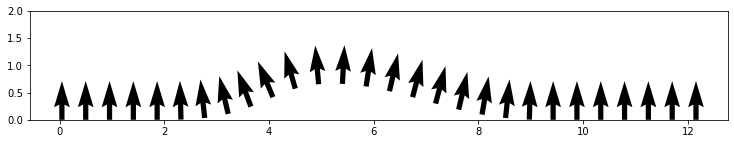

In [54]:
fig, ax = plt.subplots(figsize = (12.5, 2))
ax.quiver(cellCenters[::5,0], cellCenters[::5,1], norm_1[::5], norm_2[::5])
ax.set_ylim([0,2])

(-0.0006, 0.001)

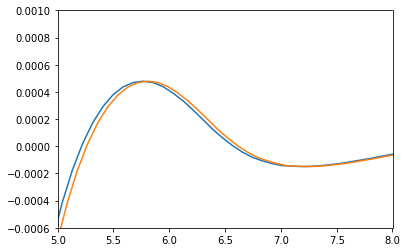

In [104]:
fig, ax = plt.subplots()
ax.plot(cellCenters[:,0], shearStress[:,1])
ax.plot(shearStressKaan[:,0], shearStressKaan[:,4])
ax.set_xlim([5,8])
ax.set_ylim([-0.0006, 0.001])